# PROBLEM STATEMENT(SALARY PROJECT)
- Predict the salary if the employee using the features provided in the data. 


Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv

# Step 1 - IMPORT ALL NECESSARY LIBRARIES

In [1]:
#Step1 - Import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV,KFold,cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

# Step 2 - LOAD DATA SET AND PERFORM DATA DESCRIPTIVE ANALYSIS

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
#checking the data shape
df.shape

(397, 6)

In [4]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
#Checking data full description
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
#checking the first five rows
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
#checking the last five rows
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [8]:
#picking 4 random samples
df.sample(4)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
287,AsstProf,A,2,0,Male,85000
386,Prof,A,29,27,Male,139219
234,AsstProf,A,8,3,Male,69700
77,Prof,B,26,19,Male,193000


In [9]:
#lets check the columns
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [10]:
#Checking for null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [11]:
#Checking the content of each Categorical columns
from collections import Counter
print("The Value Counts in rank - ",Counter(df['rank']))
print("The Value Counts in Discipline - ",Counter(df['discipline']))
print("The Value Counts in sex - ",Counter(df['sex']))

The Value Counts in rank -  Counter({'Prof': 266, 'AsstProf': 67, 'AssocProf': 64})
The Value Counts in Discipline -  Counter({'B': 216, 'A': 181})
The Value Counts in sex -  Counter({'Male': 358, 'Female': 39})


# OBSERVATIONS


# The Dataset is made up of;
- 397 rows and 6 columns
- 5 features and 1 Target

# About the Features:
1. Rank: This column shows the postion of the prospective employer and has the following Characterics;
- It is made up of Categorical(Ordinal) data
- It has three factors and shows an employee can be an AsstProf,AssocProf and Prof which are in an sequence from Lowest to   Highest
- AsstProf, AssocProf and Prof have the following counts - 67, 64 and 266 respectively
- It has no null values
- Its Datatype is an Object type

2. Discipline: This column shows the department the prospective employee is working in and has the following Characterics;
- It is made up of Categorical data
- It has two factors and shows an employee can be in Theoretical Department(i.e A) or Applied Department(i.e B)
- A and B have the following counts - 181 and 216 respectively
- It has no null values
- Its Datatype is an Object type

3. Yrs.Since.Phd: This column shows the number of years a prospective employee already has its phd and has the following Characterics;
- It is made up of Continous data
- It has no null values
- Its Datatype is an Interger type

4. Yrs.Service: This column shows the number of years the prospective employee is already working in his or her profession and has the following Characterics;
- It is made up of Continous data
- It has no null values
- Its Datatype is an Interger type

5. Sex: This column shows the category of humans of the prospective employee and has the following Characterics;
- It is made up of Categorical data
- It has two factors and shows an employee can either be a Male or a Female
- Male and Femal have the following counts - 358 and 39 respectively
- It has no null values
- Its Datatype is an Object type


# About the Target/Label:

6. Salary: This column shows the fixed regular payment to the prospective employee on a monthly basis and has the following Characterics;
- It is made up of Continous data
- It has no null values
- Its Datatype is an Interger type

**Since the target is made up of a continous data hence this is a REGRESSION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA)
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Encoding
- We cannot perform Exploratory Data Analysis on Categorical Data so we have to first of all convert them to numerical data
- Since the factors in each categorical columns are minute we can simply replace them with numerical values(i.e 0, 1, 2..etc)

In [12]:
df['rank'] = df['rank'].replace({'AsstProf':0,'AssocProf':1,'Prof':2})#This is an Ordinal fashion from lowest to highest
df['discipline'] = df['discipline'].replace({'A':0,'B':1})
df['sex'] = df['sex'].replace({'Male':0,'Female':1,})
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,0,139750
1,2,1,20,16,0,173200
2,0,1,4,3,0,79750
3,2,1,45,39,0,115000
4,2,1,40,41,0,141500
...,...,...,...,...,...,...
392,2,0,33,30,0,103106
393,2,0,31,19,0,150564
394,2,0,42,25,0,101738
395,2,0,25,15,0,95329


# Normal Distribution Curve

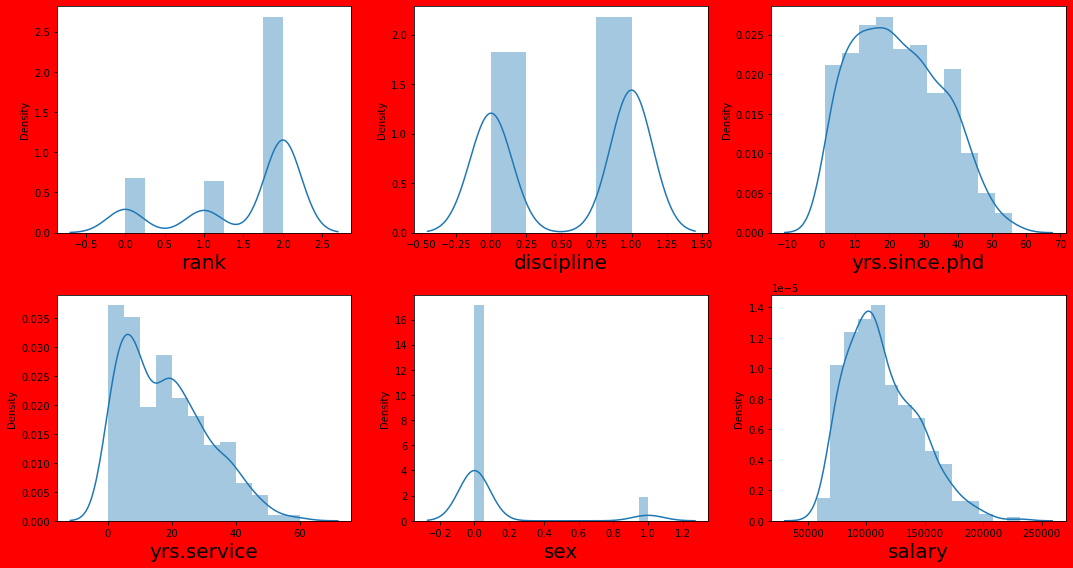

In [13]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=6:#since there are 6 features
        ax = plt.subplot(2,3,plotnumber)#2,3 means arrange the graphs in 2-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with rank
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 6
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution
From the above density plot we can see that the below features does not obey a normal distribution, the building blocks is out of normalized curve:

- rank(has three modes present or three peak points at the 0th, 1st and 2nd mark)
- discipline(has two modes present or two peak points at the 0th and 1st mark)
- yrs.since.phd
- yrs.service(has two modes present or two peak points at the 8th and 20th mark)
- sex(has two modes present or two peak points at the 0th and 1st mark)

The normal distribution of the salary is irrelevant

# Scatter Plot
- Lets visualize the relationship between the features and the Label

In [14]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex']
df_features=df[features]
df_features

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,0
1,2,1,20,16,0
2,0,1,4,3,0
3,2,1,45,39,0
4,2,1,40,41,0
...,...,...,...,...,...
392,2,0,33,30,0
393,2,0,31,19,0
394,2,0,42,25,0
395,2,0,25,15,0


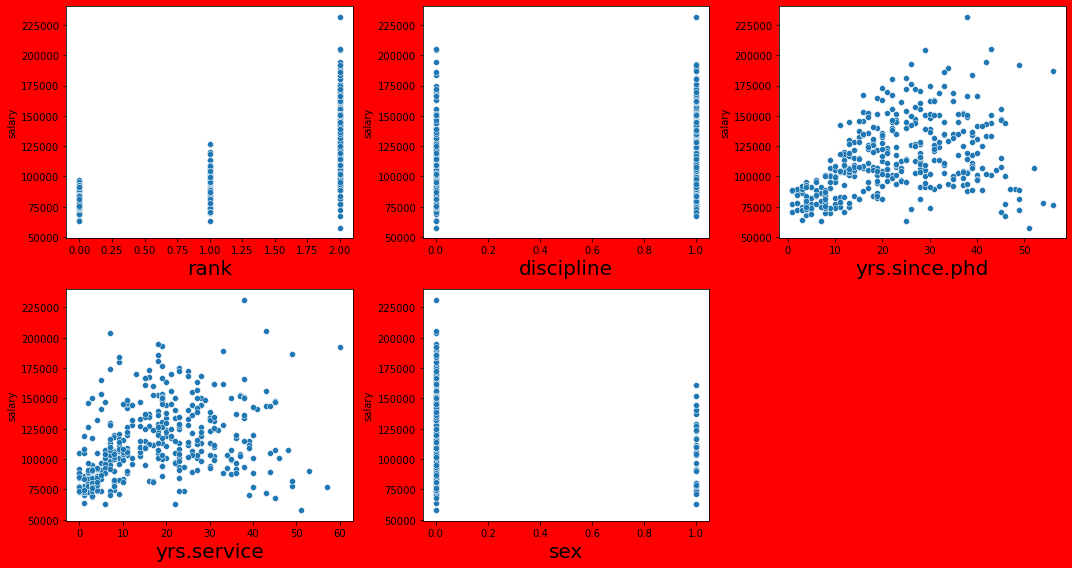

In [15]:
#Check for the relatinship between each feature and Target
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_features:#triggering your for loop
    if plotnumber<=6:#since there are 6 features
        ax = plt.subplot(2,3,plotnumber)#2,3 means arrange the graphs in 2-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=df_features[column],y=df['salary'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 6
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between the below features and the Label(Salary)

 - rank
 - yrs.since.phd
 - yrs.service


# Correlation;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [16]:
#checking for general correlation
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.107365,0.700950,0.608355,-0.138556,0.617224
discipline,-0.107365,1.000000,-0.218087,-0.164599,-0.003724,0.156084
yrs.since.phd,0.700950,-0.218087,1.000000,0.909649,-0.148788,0.419231
yrs.service,0.608355,-0.164599,0.909649,1.000000,-0.153740,0.334745
sex,-0.138556,-0.003724,-0.148788,-0.153740,1.000000,-0.138610
salary,0.617224,0.156084,0.419231,0.334745,-0.138610,1.000000


In [17]:
#checking for correlation between each feature and Label
df.corr()['salary'].sort_values()

sex             -0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.617224
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

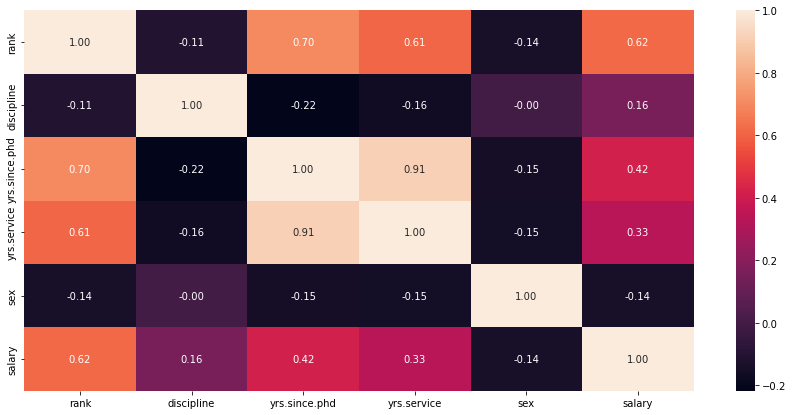

In [18]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

# Observations on Correlation
All the feature-columns of the datasets are positively correlated with the target column except 'sex' column. While two features can be seen to have a strong correlation with each other. Below are the summary of correlation;

Collinearity:
 - sex has a negative correlation with the target column which can be considered as NO BOND AT ALL!
 - discipline has 16 percent correlation with the target column which can be considered as a fairly good bond.
 - yrs.service has a 33 percent correlation with the target column which can be considered as a good bond.
 - yrs.since.phd has 41 percent correlation with the target column which can be considered as a strong bond.
 - rank has a 61 percent correlation with the target column which can be considered as a very strong bond.
 - Max correlation = rank
 - Min Correlation = sex
 
Multicollinearity:
 - From the heatmap we can see that yrs.service and yrs.since.phd has a correlation of 91 percent which is considered as a very strong bond.


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Outlier Checking

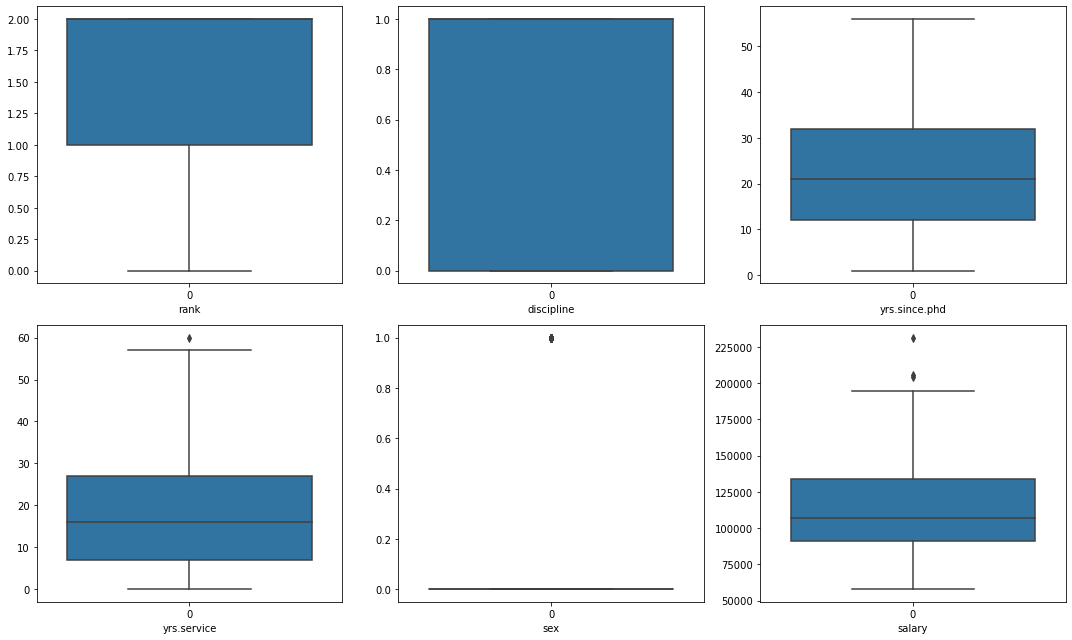

In [19]:
#Check for allien-datapoints in each column data
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=6:#this was made 6 just to allow for 6 spaces
        plt.subplot(2,3,graph)#2,3 means arrange the graphs in 2-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with rank
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Checking
From the above we can see that in the columns;
 - The features;  yrs,services and sex has little or no outliers
 - The Label; salary has little outliers

# Skewness Checking

In [20]:
#Checking for geenral Skewness
df.skew()

rank            -1.132759
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

# Observations on skewness: 
Lets assume Skewness threshold is taken as +/-0.65.Meaning any value outside +/-0.65 contains skewness. Hence Columns which are having skewness:

 - rank
 - sex
 - salary


# Step 4 - DATA PREPROCESSING

# Removal of Duplicates

In [21]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(393, 6)

 - It appears there are four rows which the same data across each columns and has been removed since the rows has decreased from 397 to 393

# Dropping of Features with Poor Correlation wrt Target

In [22]:
#Checking the correlation with respect to the Label column
df.corr()['salary'].sort_values()

sex             -0.141521
discipline       0.164018
yrs.service      0.329624
yrs.since.phd    0.414042
rank             0.616490
salary           1.000000
Name: salary, dtype: float64

Here we are setting threshold of correlation as +/-0.15, meaning any correlation outside +/-0.15 is assumed to be a strong correlation. it is not standard. The dataset demands.

In lieu of the above assumption, we have to drop 'sex' since its correlation is within +/-0.15!

In [23]:
#Dropping columns as stated
df=df.drop(columns=['sex'],axis=1)
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,0,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# Dropping of Features that strongly promotes multicollinearity

<AxesSubplot:>

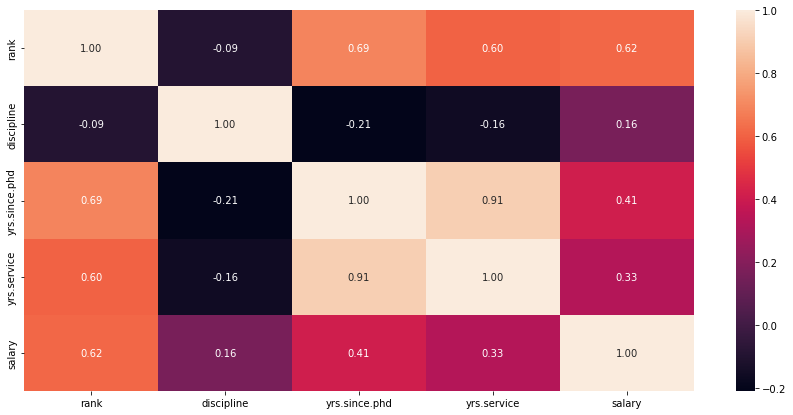

In [24]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

- From the heatmap above we can see that yrs.service and yrs.since.phd has a correlation of 91 percent which is considered as a very strong bond. This means we have to drop one of them

Choice on which feature to drop between the two?
- Recall that the correlation between the two features and label looking at the heatmap above is;
  - yrs.service      0.329624(33%)
  - yrs.since.phd    0.414042(41%)

Hence we drop the feature with the lower correlation with the label! i.e yrs.service!

In [25]:
#Dropping column as stated
df=df.drop(columns=['yrs.service'],axis=1)
df

,rank,discipline,yrs.since.phd,salary
0,2,1,19,139750
1,2,1,20,173200
2,0,1,4,79750
3,2,1,45,115000
4,2,1,40,141500
...,...,...,...,...
392,2,0,33,103106
393,2,0,31,150564
394,2,0,42,101738
395,2,0,25,95329


# Removal of Outliers

In [26]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,rank,discipline,yrs.since.phd,salary
0,0.640170,0.923999,0.273772,0.851500
1,0.640170,0.923999,0.195636,1.954661
2,2.008112,0.923999,1.445800,1.127264
3,0.640170,0.923999,1.757745,0.035260
4,0.640170,0.923999,1.367068,0.909214
...,...,...,...,...
392,0.640170,1.082253,0.820122,0.356997
393,0.640170,1.082253,0.663851,1.208140
394,0.640170,1.082253,1.523339,0.402113
395,0.640170,1.082253,0.195040,0.613478


In [27]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(393, 4)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [28]:
#index number
np.where(z>3)

(array([ 43, 360], dtype=int64), array([3, 3], dtype=int64))

In [29]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (393, 4)
New DataFrame (391, 4)
total_dropped_rows 2


In [30]:
#Checking the new dataframe with non-outliers
df_new

,rank,discipline,yrs.since.phd,salary
0,2,1,19,139750
1,2,1,20,173200
2,0,1,4,79750
3,2,1,45,115000
4,2,1,40,141500
...,...,...,...,...
392,2,0,33,103106
393,2,0,31,150564
394,2,0,42,101738
395,2,0,25,95329


# Transforming Data to Remove Skewness using Power transformation

In [31]:
#Firstly, replacing zero values with the mean of the Label(since its a continuos data), and from domain knowledge we cannot have zero salary!
df_new['salary']=df_new['salary'].replace(0,df_new['salary'].mean())

In [32]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [33]:
#extracting the columns that are skewed
data=['yrs.since.phd','salary']

In [34]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

# Seperating the datasets into Features and Target

In [35]:
#seperation
X=df_new.drop(columns=['salary'])
Y=df_new['salary']

# Transforming data into standard normal distribution

In [36]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.64247879,  0.92362361, -0.14120033],
       [ 0.64247879,  0.92362361, -0.06217733],
       [-2.00182866,  0.92362361, -1.65367331],
       ...,
       [ 0.64247879, -1.08269212,  1.40293045],
       [ 0.64247879, -1.08269212,  0.31176354],
       [-2.00182866, -1.08269212, -1.15814098]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [37]:
#reconfirming that mean is 0
X_Scaled.mean()

-2.4229931313217398e-17

In [38]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0000000000000002

# Step 5 - THE ART OF CHOOSING THE BEST MODEL

In [39]:
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()

In [40]:
#initializing and calculating the random state at which model is at optimum performance
knn=KNeighborsRegressor()
for i in range(0,5000):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

At random state 739 The model performs very well
At random state:- 739
Training Accuracy score: -  62.2
At random state 825 The model performs very well
At random state:- 825
Training Accuracy score: -  61.4
At random state 2338 The model performs very well
At random state:- 2338
Training Accuracy score: -  61.9


In [41]:
#initializing and calculating the random state at which model is at optimum performance
dt=DecisionTreeRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

In [42]:
#initializing and calculating the random state at which model is at optimum performance
rf=RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

In [43]:
#initializing and calculating the random state at which each model is at optimum performance
ada=AdaBoostRegressor()
for i in range(0,5000):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

At random state 2 The model performs very well
At random state:- 2
Training Accuracy score: -  56.7
At random state 439 The model performs very well
At random state:- 439
Training Accuracy score: -  57.9
At random state 623 The model performs very well
At random state:- 623
Training Accuracy score: -  57.8
At random state 693 The model performs very well
At random state:- 693
Training Accuracy score: -  57.6
At random state 1103 The model performs very well
At random state:- 1103
Training Accuracy score: -  58.1
At random state 1288 The model performs very well
At random state:- 1288
Training Accuracy score: -  55.2
At random state 1691 The model performs very well
At random state:- 1691
Training Accuracy score: -  55.3
At random state 2229 The model performs very well
At random state:- 2229
Training Accuracy score: -  56.7
At random state 2916 The model performs very well
At random state:- 2916
Training Accuracy score: -  57.2
At random state 3015 The model performs very well
At rando

In [44]:
#initializing and calculating the random state at which each model is at optimum performance
gb=GradientBoostingRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

In [45]:
#initializing and calculating the random state at which each model is at optimum performance
xgb=XGBRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    if round(metrics.r2_score(y_train,pred_train)*100,1)==round(metrics.r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training Accuracy score: - ",round(metrics.r2_score(y_train,pred_train)*100,1))

- From the above only KNN and AdaBoost gave us a random state were the Accuracy Score of both train and test matches!

FROM THE ABOVE, HENCE KNN IS THE BEST MODEL!!

# Splitting into train and test - KNN

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=739,test_size=0.25)

# Accuracy Score - KNN

In [47]:
#Write one function and call as many as times to check Accuracy of different models
def metric_r2_score(rgr,x_train,x_test,y_train,y_test,train=True):
    rgr.fit(x_train,y_train)
    if train:#i.e if train is equal to true since it has been set as true in the argument of the def statement
        pred_train = rgr.predict(x_train)
        print("\n====================Train Result=================")
        print(f"Accuracy Score: {metrics.r2_score(y_train, pred_train)*100:.2f}%")#:.2f means convert to 2 decimal places 
    elif train==False:
        pred_test=rgr.predict(x_test)
        print("\n====================Test Result=================")
        print(f"Accuracy Score: {metrics.r2_score(y_test, pred_test)*100:.2f}%")

# Knn - Accuracy(r2 score)

In [48]:
#Checking for accuracy score(r2) for both train and test
metric_r2_score(knn,x_train,x_test,y_train,y_test, train=True)#This is for training score
metric_r2_score(knn,x_train,x_test,y_train,y_test, train=False)#This is for testing score


====================Train Result=================
Accuracy Score: 62.63%

====================Test Result=================
Accuracy Score: 60.96%


# Cross Validation Score
Now lets use Cross Validation Score to check if model is overfitting

In [49]:
#kfold method
k_f=KFold(n_splits=3)
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [50]:
for train, test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train :',train, ' test :',test)

train : [4 5 6 7 8 9]  test : [0 1 2 3]
train : [0 1 2 3 7 8 9]  test : [4 5 6]
train : [0 1 2 3 4 5 6]  test : [7 8 9]


In [51]:
cross_val_score(knn, X_Scaled, Y, cv=2)

array([0.57610009, 0.44165393])

In [52]:
#taking the mean of the above array
cross_val_score(KNeighborsRegressor(),X_Scaled,Y,cv=2).mean()

0.50887701272919

# Step 6 - HYPERPARAMETER TUNNING
 - Prepare list of parameters with options
 - KNN algorithm has two methods - kd_tree and bruteforce methods

In [53]:
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [54]:
#instantiating into gridsearch
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)

In [55]:
##Training with tunning parameters
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [56]:
#Pick the best combination from the param_grid i.e.kd_tree,3,3 or kd_tree,3,5 or brute,3,3 and so on and then train with it
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 11}

In [57]:
#we will now use the best parameters in our KNN model and check if accuracy improved or increased
knn=KNeighborsRegressor(algorithm = 'brute', leaf_size = 3, n_neighbors = 11)

In [58]:
#tunning with the best_parameters
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=3, n_neighbors=11)

In [59]:
metric_r2_score(knn,x_train,x_test,y_train,y_test, train=True)#This is for training score
metric_r2_score(knn,x_train,x_test,y_train,y_test, train=False)#This is for testing score


====================Train Result=================
Accuracy Score: 57.19%

====================Test Result=================
Accuracy Score: 63.30%


# Step 7 - Model Saving

In [60]:
filename='Machine_Model_Project_Salary'
pickle.dump(knn,open(filename,'wb'))